In [61]:
# Installed the required packages for the task
!pip3 install PyPDF2
!pip3 install py-readability-metrics
!pip3 install wordcloud
!pip3 install nltk

In [62]:
# Importing the libraries required for the task
import nltk as nlp
import PyPDF2 as pdf
import wordcloud 
from readability import Readability

These commands are useful for various natural language processing tasks such as text tokenization,
stop word removal, and sentiment analysis

In [27]:
#Downloads the Punkt tokenizer models, which are used for tokenizing text into sentences.
nltk.download('punkt')
#Downloads a list of common stop words for various languages.
#Stop words are words that are filtered out before or after processing text.
nltk.download('stopwords')
#Downloads the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon, 
#which is a list of lexical features used to assess the sentiment of a text.
#Gold standard for social media text estimator of postive or negative OR NEUTRAL sentiment from MIT.
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\e10115326\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\e10115326\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\e10115326\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Read the two news stories found in this assignment on Canvas. In a markdown cell in your notebook, briefly characterize the issue at hand and your impressions from a news reporting objectivity perspective.

Observation:
-Two articles reports and builds a opinion based on the prespective of university board,peer review concerns on research work of Harvard President.
-Unethical practice found in research dessertation, violating the Harvard policies of research.
- Article from Fox news sharing opinion on support from black community peers to President of Harvard post allegations.

In [32]:
#Use PyPDF2 to extract the text out of each document
#a.Display the text
#b.Briefly note any anomalies in your notebook

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        text = ""
        for page in pdf_reader.pages:
            text += page.extract_text()
        return text

pdf_path1 = 'C:/Users/e10115326/Desktop/Assignment/reuters.com.pdf'
pdf_path2 = 'C:/Users/e10115326/Desktop/Assignment/foxnews.com.pdf'
extracted_text1 = extract_text_from_pdf(pdf_path1)
extracted_text2 = extract_text_from_pdf(pdf_path2)
print(extracted_text1)
 # spaces in few words post extraction "Scroll to continue2 / 3Questions about Gay's academic integrity have rocked her already tumultuous first semester"

1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing Rights
Dec 21 (Reuters) - Harvard University's president was planning to submit three corrections to
her 1997 dissertation after a committee investigating plagiarism allegations against her found
that she had made citation errors, a university spokesperson said.
Claudine Gay , who was inaugurated as Harvard's president in September , has already
submitted corrections to two published articles in recent weeks that were the focus of a
review by the Harvard Corporation, the university's governing boa

In [33]:
Observation:
# Unnecessary spaces between words:
-Few words from setences are not extracted correctly. Examplke:"HAR VARD BOARD ST ANDS BY EMBA TTLED PRESIDENT CLAUDINE GA Y, ADMITS
‘INADEQUA TE CIT ATION’ IN SOME WRITINGS2 ","against Gay on T uesday"
- Test at the end of each page with transition in next page are not extracted correctly. Unnecessary space created which distorts the meaning.
print(extracted_text2)

1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the Harvard Corporation, the unive

In [34]:
#Use NLTK to complete sentiment analysis for each of the articles
#a.Compare the results from the two articles
#b.Compare the results to your reading of the articles; do you agree with the outcome?

#import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string


In [49]:
# Tokenize the text
tokens = word_tokenize(extracted_text1)
print(tokens)
# Convert to lowercase
tokens = [w.lower() for w in tokens]
print(tokens)
# Remove punctuation from each word
table = str.maketrans('', '', string.punctuation)
print(table)
stripped = [w.translate(table) for w in tokens]
print(stripped)
# Remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
print(words)
# Filter out stop words
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words)

['1', '/', '3Gabriella', 'BorterHarvard', 'president', 'will', 'submit', 'dissertation', 'edits', 'after', 'plagiarism', 'allegations', 'reuters.com', '/world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21', 'Harvard', 'University', 'President', 'Claudine', 'Gay', 'testifies', 'before', 'a', 'House', 'Education', 'and', 'The', 'Workforce', 'Committee', 'hearing', 'titled', '``', 'Holding', 'Campus', 'Leaders', 'Accountable', 'and', 'Confronting', 'Antisemitism', "''", 'on', 'Capitol', 'Hill', 'in', 'W', 'ashington', ',', 'U.S.', ',', 'December', '5', ',', '2023', '.', 'REUTERS/Ken', 'Cedeno/File', 'Photo', 'Acquire', 'Licensing', 'Rights', 'Dec', '21', '(', 'Reuters', ')', '-', 'Harvard', 'University', "'s", 'president', 'was', 'planning', 'to', 'submit', 'three', 'corrections', 'to', 'her', '1997', 'dissertation', 'after', 'a', 'committee', 'investigating', 'plagiarism', 'allegations', 'against', 'her', 'found', 'that', 'she', 'had', 'made', 

Use NLTK to complete sentiment analysis for each of the articles
a.Compare the results from the two articles
b.Compare the results to your reading of the articles; do you agree with the outcome?

In [51]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sen = SentimentIntensityAnalyzer()

# Perform sentiment analysis for extracted_text1
scores1 = sen.polarity_scores(extracted_text1)

# Perform sentiment analysis for extracted_text2
scores2 = sen.polarity_scores(extracted_text2)

# Compare the results from the two articles
print("Sentiment scores for Reuter news:", scores1)
print("Sentiment scores for Fox news:", scores2)

Sentiment scores for Reuter news: {'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}
Sentiment scores for Fox news: {'neg': 0.065, 'neu': 0.866, 'pos': 0.07, 'compound': 0.7243}


Observation:

Reuters article tone is  neutral,but leans towards the negative sentiment of the issue as reflected in the low "neg'score. Overall -ve vlaue of -0.9719 gives it a negative vibe.

Fox news artcile tone is neutral,but leans towards positive sentiment overall.

I agree with the sentiment analysis result after reading them personally. 


Run sentiment analysis on the article headlines
a.Do those results agree with the overall sentiment?

In [52]:
headline1 = "Harvard president will submit dissertation edits after plagiarism allegations"
headline2 = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"

sentiment_headline1 = sen.polarity_scores(headline1)
sentiment_headline2 = sen.polarity_scores(headline2)

print("Sentiment Analysis for Reuters  Headline", sentiment_headline1)
print("Sentiment Analysis for Fox News Headline", sentiment_headline2)

Sentiment Analysis for Reuters  Headline {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment Analysis for Fox News Headline {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}


Observation:

Headline sentiment seem to contradict the analysis result of the article body in this case.

Using py-readability-metrics complete 2-3 different readability scores
a.Discuss what the chosen metric is measuring
b.Compare the scores from both articles


1.Flesch Reading Ease Score: This score tells you how easy or difficult a piece of text is to read. The higher the score,
the easier it is to read. For example, a score of 60-70 is considered fairly easy to read.


In [56]:
import textstat 
readability_score1 = textstat.flesch_reading_ease(extracted_text1)
print(readability_score1)
readability_score2 = textstat.flesch_reading_ease(extracted_text2)
print(readability_score2)


32.22
31.65


Observation: Artcile from Reuters is slightly easy to read compared to Fox news based on the above score.

2. Flesch Kincaid Grade Level Score: This score tells you the grade level of education someone would need to easily understand a piece of text. For example, a score of 8 means an 8th grader would find it easy to understand.

In [57]:
# Calculating Flesch-Kincaid Grade Level
fk_grade1 = textstat.flesch_kincaid_grade(extracted_text1)
print(fk_grade1)
fk_grade2 = textstat.flesch_kincaid_grade(extracted_text2)
print(fk_grade2)

14.2
16.5


observaion: Fox news article could be easily understood by someone who is in higher grade,where as Restuers would be easy to understand for lower grade individual

3.SMOG Index Score: This score also tells you the grade level of education needed to understand a piece of text. It's based on the number of polysyllabic words (words with more than one syllable) in a sample of text.

In [58]:
# Calculating SMOG Index
smog_index1 = textstat.smog_index(extracted_text1)
print(smog_index1)
smog_index2 = textstat.smog_index(extracted_text2)
print(smog_index2)

15.6
17.4


Observation :Smog Index confirms that Fox news article is slightly difficult to understand compared to Restuers for a lower grade individual.

Using wordcloud, create word clouds for both articles
a.Briefly comment on the word clouds

Word Cloud For Reuter's Article


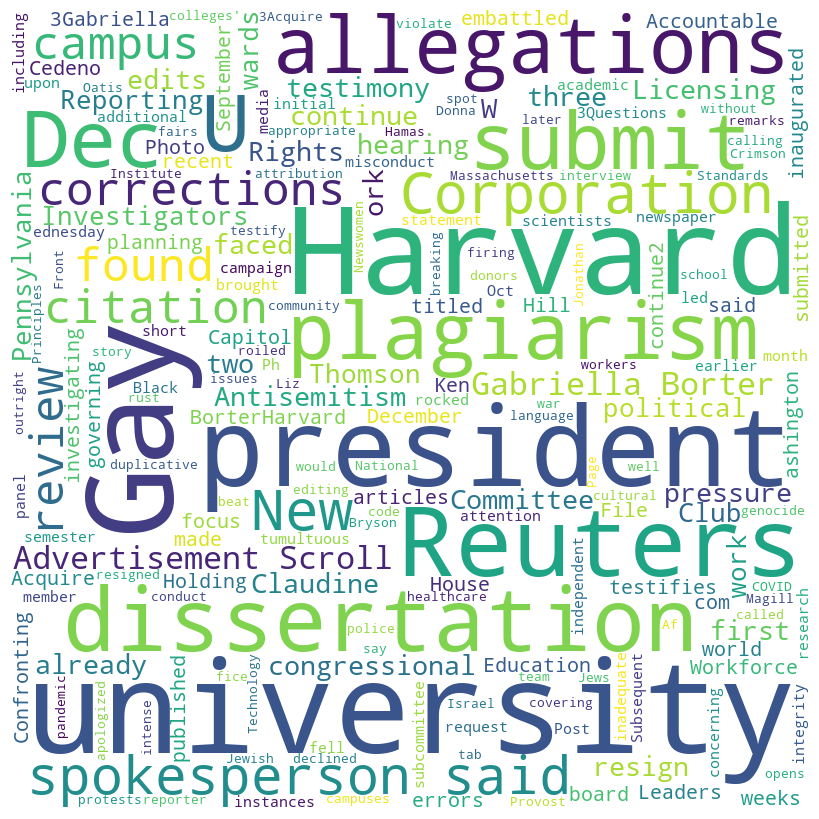

Word Cloud For Fox New's Article


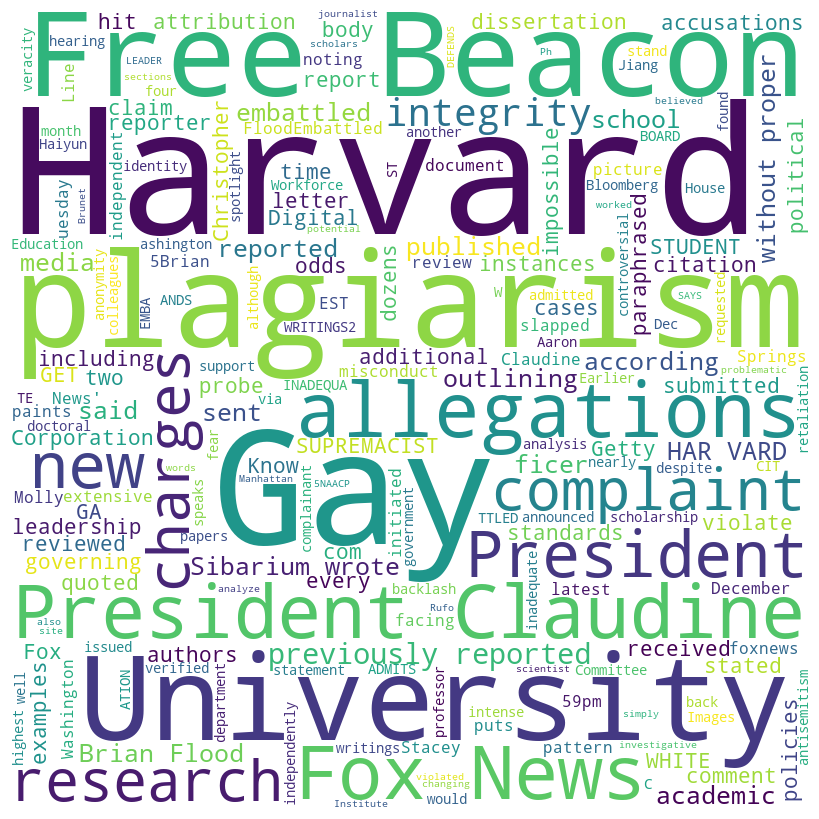

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



def generate_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='White', 
                stopwords = set(nltk.corpus.stopwords.words('english')),
                min_font_size = 10).generate(text)
    
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show()

print("Word Cloud For Reuter's Article")
generate_wordcloud(extracted_text1)
print("Word Cloud For Fox New's Article")
generate_wordcloud(extracted_text2)

Observation: Word cloud from both article highlight similar kind of issue at Harvard focused on allegations on the President Gay. With Reuters article highlighting  "dissertation" impacting the reputation on Phd research published by Harvard for someone reading the article.